In [336]:
# грузим библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [337]:
# создаем датафрейм
df_path = ПУТЬ_ДО_ФАЙЛА (из сети не подгружался, ибо данные из слака)
cardio_train = pd.read_csv(df_path, sep=';')

In [338]:
# проверяем, что все получилось
print(cardio_train)
type(cardio_train)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

pandas.core.frame.DataFrame

In [339]:
### Задание 1 ###

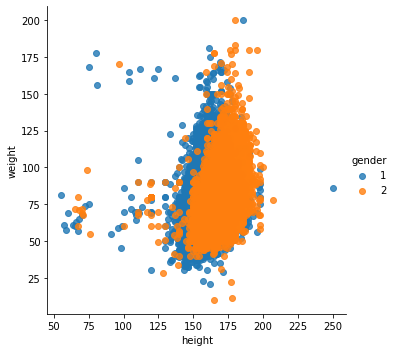

In [340]:
# мужчины, как правило, крупнее женщин, потому их рост и вес в популяции должен быть чуть больше
sns.lmplot(x='height', y='weight', hue='gender', data=cardio_train, fit_reg=False)

In [341]:
# отлично! 1 - это женщины, а 2 - это мужчины

In [342]:
# преобразуем нашу пандасовскую серию пола, чтобы было понятнее смотреть
cardio_train['gender'] = cardio_train['gender'].replace(1, 'female')
cardio_train['gender'] = cardio_train['gender'].replace(2, 'male')
cardio_train # проверяем, что все получилось

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,male,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,female,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,male,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,female,163,72.0,135,80,1,2,0,0,0,1


In [343]:
### Задание 2 ###

In [344]:
# создаем новый признак индекса массы тела (BMI), вес в килограммах на квадрат роста в метрах
cardio_train['BMI'] = pd.to_numeric(cardio_train['height']) # переводим строки в числа
cardio_train['BMI'] = np.square(cardio_train['BMI'] / 100) # переводим рост в метры и возводим в квадрат
cardio_train['BMI'] = cardio_train['weight'] / cardio_train['BMI'] # делим вес в килограммах на пандасовскую серию
cardio_train # принтуем, чтоы убедиться, что все правильно

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,male,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,female,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,female,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,male,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,female,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,male,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,female,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,male,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,female,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [345]:
# затестим, что все работает правильно на примере первой строчки
62.0 / pow(168/100, 2)
# отлично, все работает, тест прошли!

21.9671201814059

In [346]:
### Задание 3 ###
# визуализация распределения переменной индекса массы тела

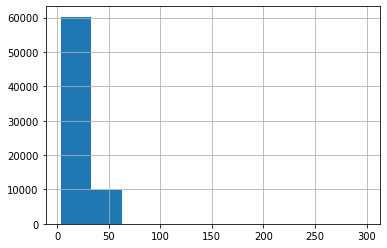

In [347]:
# простая гистограмма из базовой графики
cardio_train.BMI.hist(range=(cardio_train.BMI.min(), cardio_train.BMI.max()))
# судя по распределению, выбросы явно есть, попробуем их лучше вычленить

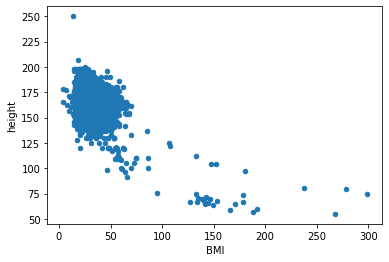

In [348]:
# распределение индекса массы тела в зависимости от роста
cardio_train.plot.scatter(x='BMI', y='height')

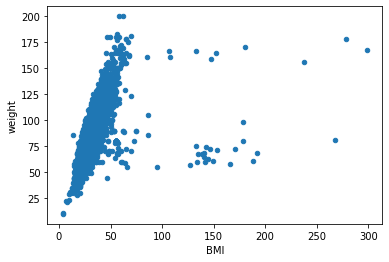

In [349]:
# распределение индекса массы тела в зависимости от веса
cardio_train.plot.scatter(x='BMI', y='weight')

In [350]:
# на этих двух графиках мы видим, что есть основное "пятно", куда попадает большая часть наших значений
# также видим, что есть выбросы
# чтобы быть точнее, то возмем квантили 0.025 и 0.975
np.quantile(cardio_train['BMI'], 0.025)

19.841269841269845

In [351]:
np.quantile(cardio_train['BMI'], 0.975)

40.269559500328725

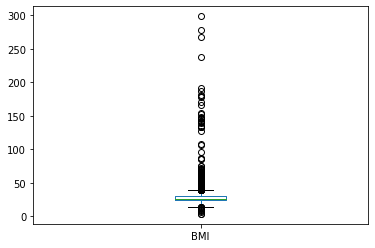

In [352]:
# каков вывод? А вывод такой, что 95% наших значений индекса массы тела лежат в диапазоне от 19.8 до 40.3
# остальные точки - выбросы, для полноты картины построим боксплот:
cardio_train['BMI'].plot.box()

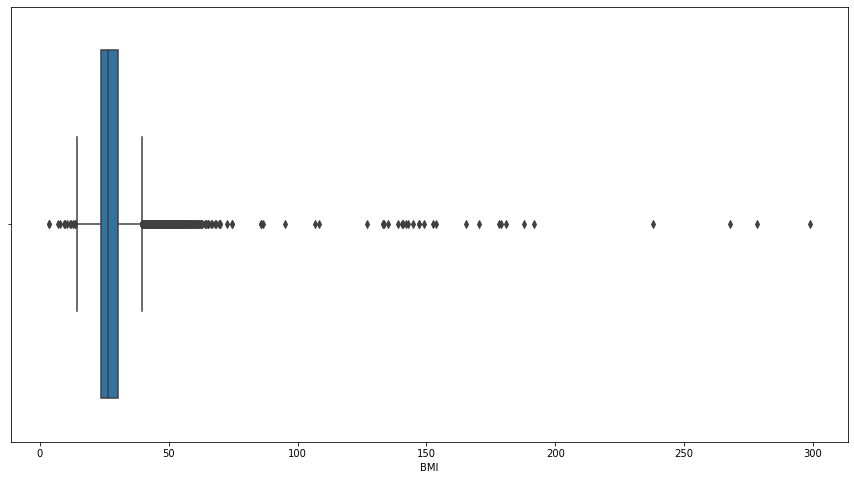

In [353]:
plt.figure(figsize = (15, 8)) # увеличим размер картинки
sns.boxplot(cardio_train['BMI'])

In [354]:
### Задание 4 ###

In [355]:
# новый датафрейм для пациентов, у которых диастолическое давление ниже систолического
cardio_train_subset_by_ap = cardio_train[cardio_train['ap_hi'] > cardio_train['ap_lo']]

In [356]:
# какой процент от общего количества пациентов они составляли?
(cardio_train_subset_by_ap.shape[0] / cardio_train.shape[0]) * 100 # ответ: 98.2%

98.23428571428572

In [357]:
### Задание 5 ###

In [358]:
# переведем возраст из дней в года и посмотрим, как можно разбить возраст на возрастные группы
cardio_train['age'] = (cardio_train['age'] / 365).round()

30.0 65.0


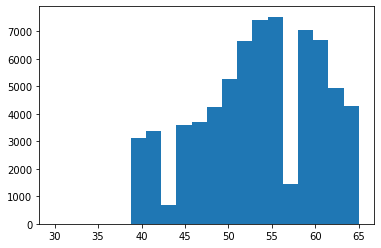

In [359]:
plt.hist(cardio_train.age, 20)
print(min(cardio_train.age), max(cardio_train.age))
# разобьем условно возрастне группы:
# under 39
# 40-49
# 50-59
# 60+

In [360]:
# созданим новую серию возрастных групп для удобства
cardio_train.loc[cardio_train['age'] < 40, 'age_group'] = 'under 39'
cardio_train.loc[(cardio_train['age'] < 50) & (cardio_train['age'] > 39), 'age_group'] = '40-49'
cardio_train.loc[(cardio_train['age'] < 60) & (cardio_train['age'] > 49), 'age_group'] = '50-59'
cardio_train.loc[cardio_train['age'] > 59, 'age_group'] = '60+'
cardio_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_group
0,0,50.0,male,168,62.0,110,80,1,1,0,0,1,0,21.967120,50-59
1,1,55.0,female,156,85.0,140,90,3,1,0,0,1,1,34.927679,50-59
2,2,52.0,female,165,64.0,130,70,3,1,0,0,0,1,23.507805,50-59
3,3,48.0,male,169,82.0,150,100,1,1,0,0,1,1,28.710479,40-49
4,4,48.0,female,156,56.0,100,60,1,1,0,0,0,0,23.011177,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,male,168,76.0,120,80,1,1,1,0,1,0,26.927438,50-59
69996,99995,62.0,female,158,126.0,140,90,2,2,0,0,1,1,50.472681,60+
69997,99996,52.0,male,183,105.0,180,90,3,1,0,1,0,1,31.353579,50-59
69998,99998,61.0,female,163,72.0,135,80,1,2,0,0,0,1,27.099251,60+


In [361]:
# перекодируем обратно из цифровых показателей уровень холестерола 
chol_values = {1:'low', 2:'normal', 3:'high'} # обычный словарь Python
cardio_train['cholesterol'] = cardio_train['cholesterol'].map(chol_values)

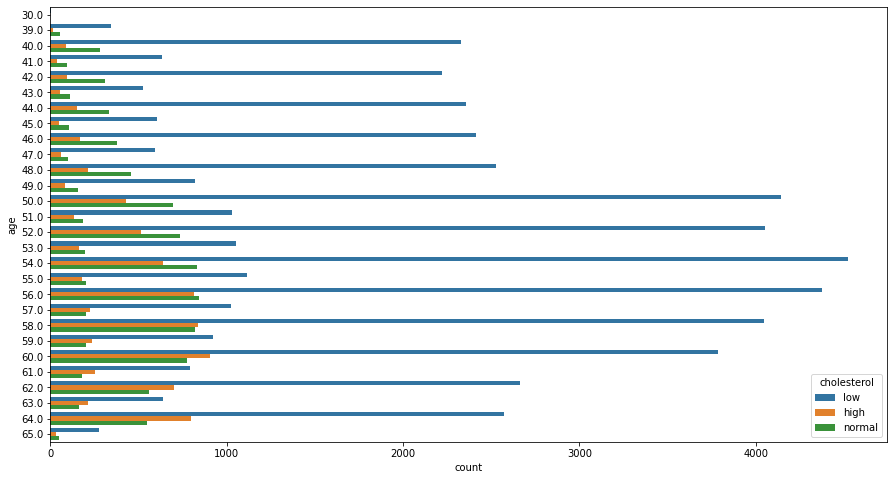

In [362]:
# распределение уровня холестерина для различных возрастных категорий
plt.figure(figsize = (15, 8)) # увеличим размер картинки
sns.countplot(y = 'age', hue = 'cholesterol', data = cardio_train)

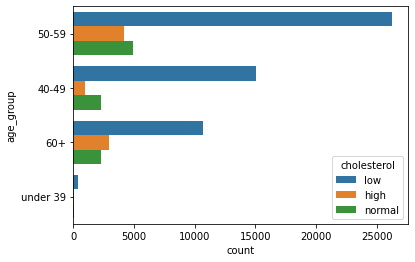

In [363]:
# распределение уровня холестерина для различных возрастных категорий (с разграничениями по возрастным группам)
sns.countplot(y = 'age_group', hue = 'cholesterol', data = cardio_train)

In [364]:
### Задание 6 ###

In [365]:
# как соотносятся ИМТ и наличие ССЗ?
# расследуем!
# но сначала запишем нормально значения по сердечно-сосудистым заболеваниям:
cardio_train['cardio'] = cardio_train['cardio'].astype(bool)

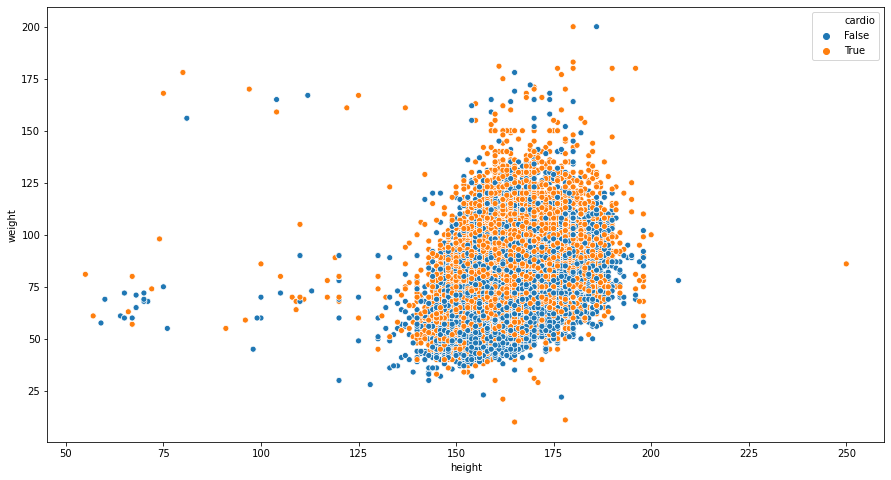

In [366]:
# не ИМТ, но можно посмотреть, как соотносится вес и рост с тем, есть ли у человека ССЗ или нет
plt.figure(figsize = (15, 8)) # увеличим размер картинки
sns.scatterplot(x = 'height', y = 'weight', hue='cardio', data = cardio_train)
# видим, что есть какое-то подозрительная тендеция: чем больше вес, тем хуже с заболеванием

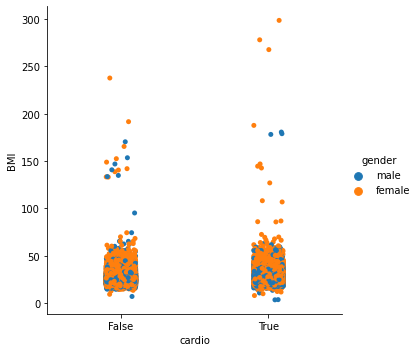

In [367]:
# попробуем так, красоты ради добавив пол
sns.catplot(x="cardio", y="BMI", hue='gender', data=cardio_train)

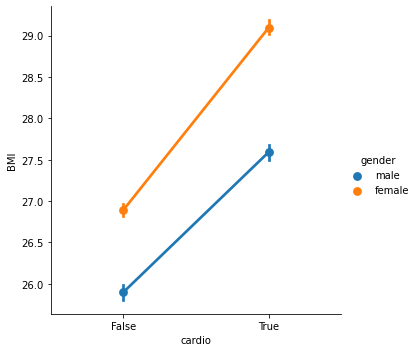

In [368]:
# еще график (как мне кажется, наиболее наглядный)
sns.catplot(x="cardio", y="BMI", hue="gender", kind="point", data=cardio_train);